 # Convolutional neural network multi-class classification

__Author:__ John Leung

__Content:__ This program is a CNN using the TensorFlow v2 framework. It accepts a train set of labeled data (X_train, Y_train) to train the weights of the network. Then it tests it on a test set (X_test, Y_test). The architecture of of the CNN follows input → Conv → FC → output. The task involved in the default data is to identify whether a (single) hand is gesturing a number (y = 1 to 5). The default image size is 64×64 with 3 channels (RGB).

This program is inspired by and use data source from the course on [Convolutional Neural Network](https://www.coursera.org/learn/convolutional-neural-networks) provided by __deeplearning.ai__ on __Coursera__.

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

import tensorflow as tf

from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline

Loading data and preprocessing. We use the the convention
```
X:{examples, feature_width, feature_height, feature_depth (color)},
```
and
```
Y:{examples, 1}.
```
In the default hand-gesture data set, the numerical value of the elements in Y is one of the integers in {0,1,2,3,4,5}. Indicating that the single hand gesturing 0-5. In the older TensorFlow v1 program, the dimension of Y would have been Y:{examples, classes}, with the second dimension being the one-hot representation of classes. In TensorFlow v2, we will just use the index of the one-hot vector as the label.

y = 4


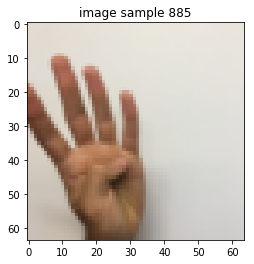

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 1)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 1)


In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

index_sample = np.random.randint(0,high=X_train_orig.shape[0])
plt.imshow(X_train_orig[index_sample])
plt.title('image sample %i' % index_sample)
print ("y = " + str(np.squeeze(Y_train_orig[:, index_sample])))
plt.show();

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
# Tensorflow 2.0 does not support one-hot
#Y_train = convert_to_one_hot(Y_train_orig, 6).T
#Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

## Model building

Setting up the a simple CNN model with __1.)__ a few layers of convolutional filter intertwined with drop-outs and poolings; __2.)__ flatten the 2D array into 1D vector and fit it to the fully-connected layers; __3.)__ one or a few fully-connected layers that eventually lead to a softmax activation output.

In [3]:
n_W = X_train.shape[1]; n_H = X_train.shape[2]; n_C = X_train.shape[3];
Y_classes = 6;

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (4,4), strides=(1,1), activation='relu', padding = 'SAME', input_shape=(n_W, n_H, n_C)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D((8, 8), strides=(8,8), padding = 'SAME'),
  tf.keras.layers.Conv2D(16, (2,2), strides=(1,1), activation='relu', padding = 'SAME'), 
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.MaxPooling2D((4, 4), strides=(4,4), padding = 'SAME'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(Y_classes, activation='softmax')
])

## Model fitting

Defining the optimizer, loss function and goodness of fit metric. The model defined above is then fitted to the train set (X_train, Y_train) using a default 200 epochs and 64 mini-batch size.

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train, Y_train, epochs=200, batch_size=64, validation_data=(X_test, Y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/200
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.7933 - sparse_categorical_accuracy: 0.1731 - val_loss: 1.7920 - val_sparse_categorical_accuracy: 0.1667
Epoch 2/200
1080/1080 [==============================] - 1s 560us/sample - loss: 1.7922 - sparse_categorical_accuracy: 0.1704 - val_loss: 1.7913 - val_sparse_categorical_accuracy: 0.1833
Epoch 3/200
1080/1080 [==============================] - 1s 544us/sample - loss: 1.7920 - sparse_categorical_accuracy: 0.1778 - val_loss: 1.7912 - val_sparse_categorical_accuracy: 0.1667
Epoch 4/200
1080/1080 [==============================] - 1s 546us/sample - loss: 1.7917 - sparse_categorical_accuracy: 0.1769 - val_loss: 1.7910 - val_sparse_categorical_accuracy: 0.1667
Epoch 5/200
1080/1080 [==============================] - 1s 543us/sample - loss: 1.7916 - sparse_categorical_accuracy: 0.1769 - val_loss: 1.7907 - val_sparse_categorical_accuracy: 0.1833
Epoch 6/200
1080/108

Epoch 88/200
1080/1080 [==============================] - 1s 550us/sample - loss: 1.3149 - sparse_categorical_accuracy: 0.7769 - val_loss: 1.3842 - val_sparse_categorical_accuracy: 0.6833
Epoch 89/200
1080/1080 [==============================] - 1s 541us/sample - loss: 1.3303 - sparse_categorical_accuracy: 0.7583 - val_loss: 1.3673 - val_sparse_categorical_accuracy: 0.7417
Epoch 90/200
1080/1080 [==============================] - 1s 539us/sample - loss: 1.3216 - sparse_categorical_accuracy: 0.7630 - val_loss: 1.3665 - val_sparse_categorical_accuracy: 0.7417
Epoch 91/200
1080/1080 [==============================] - 1s 550us/sample - loss: 1.3183 - sparse_categorical_accuracy: 0.7611 - val_loss: 1.3743 - val_sparse_categorical_accuracy: 0.7417
Epoch 92/200
1080/1080 [==============================] - 1s 562us/sample - loss: 1.3221 - sparse_categorical_accuracy: 0.7676 - val_loss: 1.3599 - val_sparse_categorical_accuracy: 0.7500
Epoch 93/200
1080/1080 [==============================] - 1s

1080/1080 [==============================] - 1s 564us/sample - loss: 1.2164 - sparse_categorical_accuracy: 0.8537 - val_loss: 1.2712 - val_sparse_categorical_accuracy: 0.8083
Epoch 175/200
1080/1080 [==============================] - 1s 567us/sample - loss: 1.2172 - sparse_categorical_accuracy: 0.8593 - val_loss: 1.2739 - val_sparse_categorical_accuracy: 0.7917
Epoch 176/200
1080/1080 [==============================] - 1s 563us/sample - loss: 1.2149 - sparse_categorical_accuracy: 0.8565 - val_loss: 1.2667 - val_sparse_categorical_accuracy: 0.8250
Epoch 177/200
1080/1080 [==============================] - 1s 560us/sample - loss: 1.2135 - sparse_categorical_accuracy: 0.8500 - val_loss: 1.2687 - val_sparse_categorical_accuracy: 0.8083
Epoch 178/200
1080/1080 [==============================] - 1s 558us/sample - loss: 1.2260 - sparse_categorical_accuracy: 0.8417 - val_loss: 1.2694 - val_sparse_categorical_accuracy: 0.8083
Epoch 179/200
1080/1080 [==============================] - 1s 558us/s

## Result

Showing the model summary, and a plot of loss and accuracy as a function of epoch. The latter can be used as a cross-check that the gradient descent is working properly. The model is then also evaluted against the test set (X_test, Y_test) to evaluate its variance.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

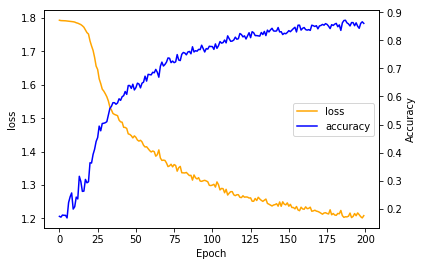

In [6]:
model.summary();

fig, ax1 = plt.subplots()
lns1 = ax1.plot(history.history['loss'], label = 'loss', color='orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('loss')

ax2 = ax1.twinx()
lns2 = ax2.plot(history.history['sparse_categorical_accuracy'], label='accuracy', color='blue')
ax2.set_ylabel('Accuracy')

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='right')
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

## Prediction

Generate prediction on an image in the local folder _images/_. 

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


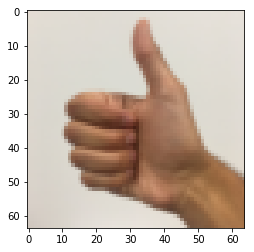

prediction: [2.4176332e-16 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00]

The predicted number is 3.


In [7]:
fname = "images/thumbs_up.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(n_W,n_H))
plt.imshow(my_image); plt.show();

my_image = my_image.reshape((1,n_W,n_H,n_C))
prediction = model.predict(my_image)
#print ("prediction: " + str(prediction[0]) + "\n")
print("The predicted number is %i." % np.where(prediction[0] == 1)[0])